QGNN implementation 
Aditya Gupta
MT19AIE206

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from math import pi

In [4]:
!pip install pyqpanda
from pyqpanda import *


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
%matplotlib inline

In [4]:

def decompositional_processing(G, X):
    # Initialize the ego-graph set and ego-graph features set
    S = {v: set() for v in G}
    C = {v: [] for v in G}

    # Iterate over each node in the graph
    for v in G:
        # Add the node and its neighbors to the ego-graph set
        S[v].add(v)
        S[v].update(G[v])

        # Iterate over the neighbors of the node
        for mu in G[v]:
            # Add the features of the neighbor to the ego-graph features set
            C[v].append(X[mu])

    return S, C

# Example usage:
# Define a graph G with nodes and edges
G = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C'],
    'E': ['A', 'D']
}

# Define node features X
X = {
    'A': 'Feature_A',
    'B': 'Feature_B',
    'C': 'Feature_C',
    'D': 'Feature_D',
    'E': 'Feature_E'
}

# Call the function with the graph and node features
ego_graphs, ego_graph_features = decompositional_processing(G, X)

# Print the results
print("Ego-graphs:", ego_graphs)
print("Ego-graph features:", ego_graph_features)

Ego-graphs: {'A': {'A', 'C', 'B'}, 'B': {'A', 'B', 'D'}, 'C': {'A', 'C', 'D'}, 'D': {'C', 'B', 'D'}, 'E': {'A', 'E', 'D'}}
Ego-graph features: {'A': ['Feature_B', 'Feature_C'], 'B': ['Feature_A', 'Feature_D'], 'C': ['Feature_A', 'Feature_D'], 'D': ['Feature_B', 'Feature_C'], 'E': ['Feature_A', 'Feature_D']}


In [97]:
# Assuming G is your graph and X is your node features
G_nx = nx.Graph()
for node, neighbors in G.items():
    for neighbor in neighbors:
        G_nx.add_edge(node, neighbor)

# ego = 'A'  # Replace 'A' with the node you want to create an ego graph for
# ego_graph = nx.ego_graph(G_nx, ego)

In [100]:
pos = nx.spring_layout(G_nx)
nx.draw(G_nx, pos, node_color='lavender', node_size=800, with_labels=True)
# nx.draw_networkx_nodes(ego_graph, pos, nodelist=[v], node_size=1000, node_color='red')
plt.title(f"Graph G")
plt.show()

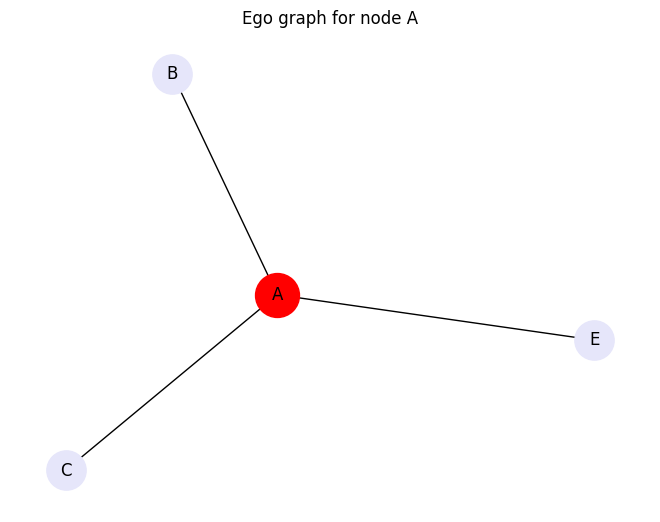

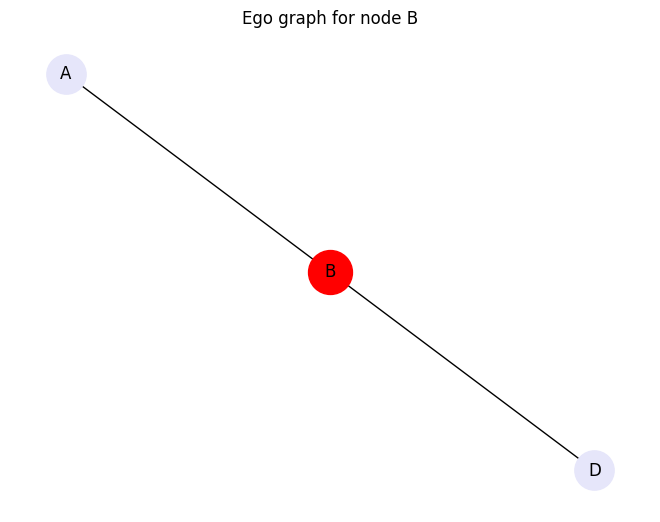

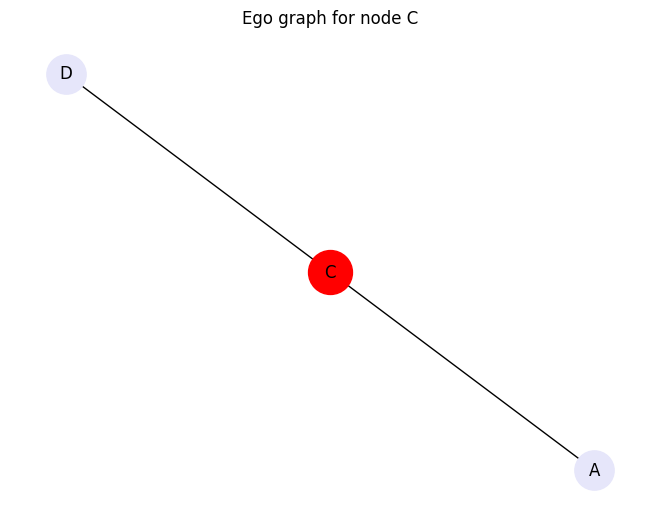

In [101]:

for v in G:
    ego_graph = nx.ego_graph(G_nx, v)
    pos = nx.spring_layout(ego_graph)
    nx.draw(ego_graph, pos, node_color='lavender', node_size=800, with_labels=True)
    nx.draw_networkx_nodes(ego_graph, pos, nodelist=[v], node_size=1000, node_color='red')
    plt.title(f"Ego graph for node {v}")
    plt.axis('off')
    plt.show()

In [6]:
#  load mutag data 

#  source of data : https://chrsmrrs.github.io/datasets/docs/datasets/

# /content/drive/MyDrive/Data/MUTAG

mut_edgel = np.loadtxt('/data/notebook_files/MUTAG/MUTAG_edge_labels.txt')
mut_nodel = np.loadtxt('/data/notebook_files/MUTAG/MUTAG_node_labels.txt')
mut_graphl = np.loadtxt('/data/notebook_files/MUTAG/MUTAG_graph_labels.txt')
mut_graphi = np.loadtxt('/data/notebook_files/MUTAG/MUTAG_graph_indicator.txt')
A= np.loadtxt('/data/notebook_files/MUTAG/MUTAG_A.txt', dtype=str)

In [5]:
len(mut_graphi)

3371

In [7]:
# Node labels:

#   0  C
#   1  N
#   2  O
#   3  F
#   4  I
#   5  Cl
#   6  Br

# Edge labels:

#   0  aromatic
#   1  single
#   2  double
#   3  triple


# define colors for each label
color_dict= {0:"Red", 1:"Blue", 2:"Yellow",3:"Green", 4:"Gray", 5:"Purple", 6:"Pink"}
label_dict = {0:"C", 1:"N", 2:"O",3:"F", 4:"I", 5:"Cl", 6:"Br"}
# create dict for nodes
node={}
for i in range(len(mut_nodel)):
   node[str(i)]= {"color":color_dict[mut_nodel[i]], 'label' : mut_nodel[i], 'label_v' :label_dict[mut_nodel[i]], 'graphi' : mut_graphi[i] }

In [8]:
node

{'0': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '1': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '2': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '3': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '4': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '5': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '6': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '7': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '8': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '9': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '10': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '11': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '12': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '13': {'color': 'Red', 'label': 0.0, 'label_v': 'C', 'graphi': 1.0},
 '14': {'color': 'Blue', 'labe

In [8]:
# dict for edge labels
bond_dict = {0:"aromatic", 1:"single", 2:"double", 3:"triple"}
# list to define edges
edges=[]
for i in range(len(mut_edgel)):
   edges.append((A[i][0].split(',')[0], A[i][1],bond_dict[mut_edgel[i]]))

In [9]:
edges[0:5]

[('2', '1', 'aromatic'),
 ('1', '2', 'aromatic'),
 ('3', '2', 'aromatic'),
 ('2', '3', 'aromatic'),
 ('4', '3', 'aromatic')]

In [10]:
# init graph
mut_G = nx.Graph()
# add nodes and edges
mut_G.add_nodes_from(n for n in node.items())
mut_G.add_edges_from((u, v, {"type": label}) for u, v, label in edges)

In [11]:
mut_G_sgs = [mut_G.subgraph(c).copy() for c in nx.connected_components(mut_G)]
len(mut_G_sgs) # ignore 1st g  i = 0 

189

In [12]:

g = mut_G_sgs[2]

In [13]:
g = mut_G_sgs[2]
pos = nx.spring_layout(g)
nx.draw(g, pos, node_color='lavender', node_size=800, with_labels=True)
# nx.draw_networkx_nodes(ego_graph, pos, nodelist=[v], node_size=1000, node_color='red')
plt.title(f"Graph 1")
plt.show()

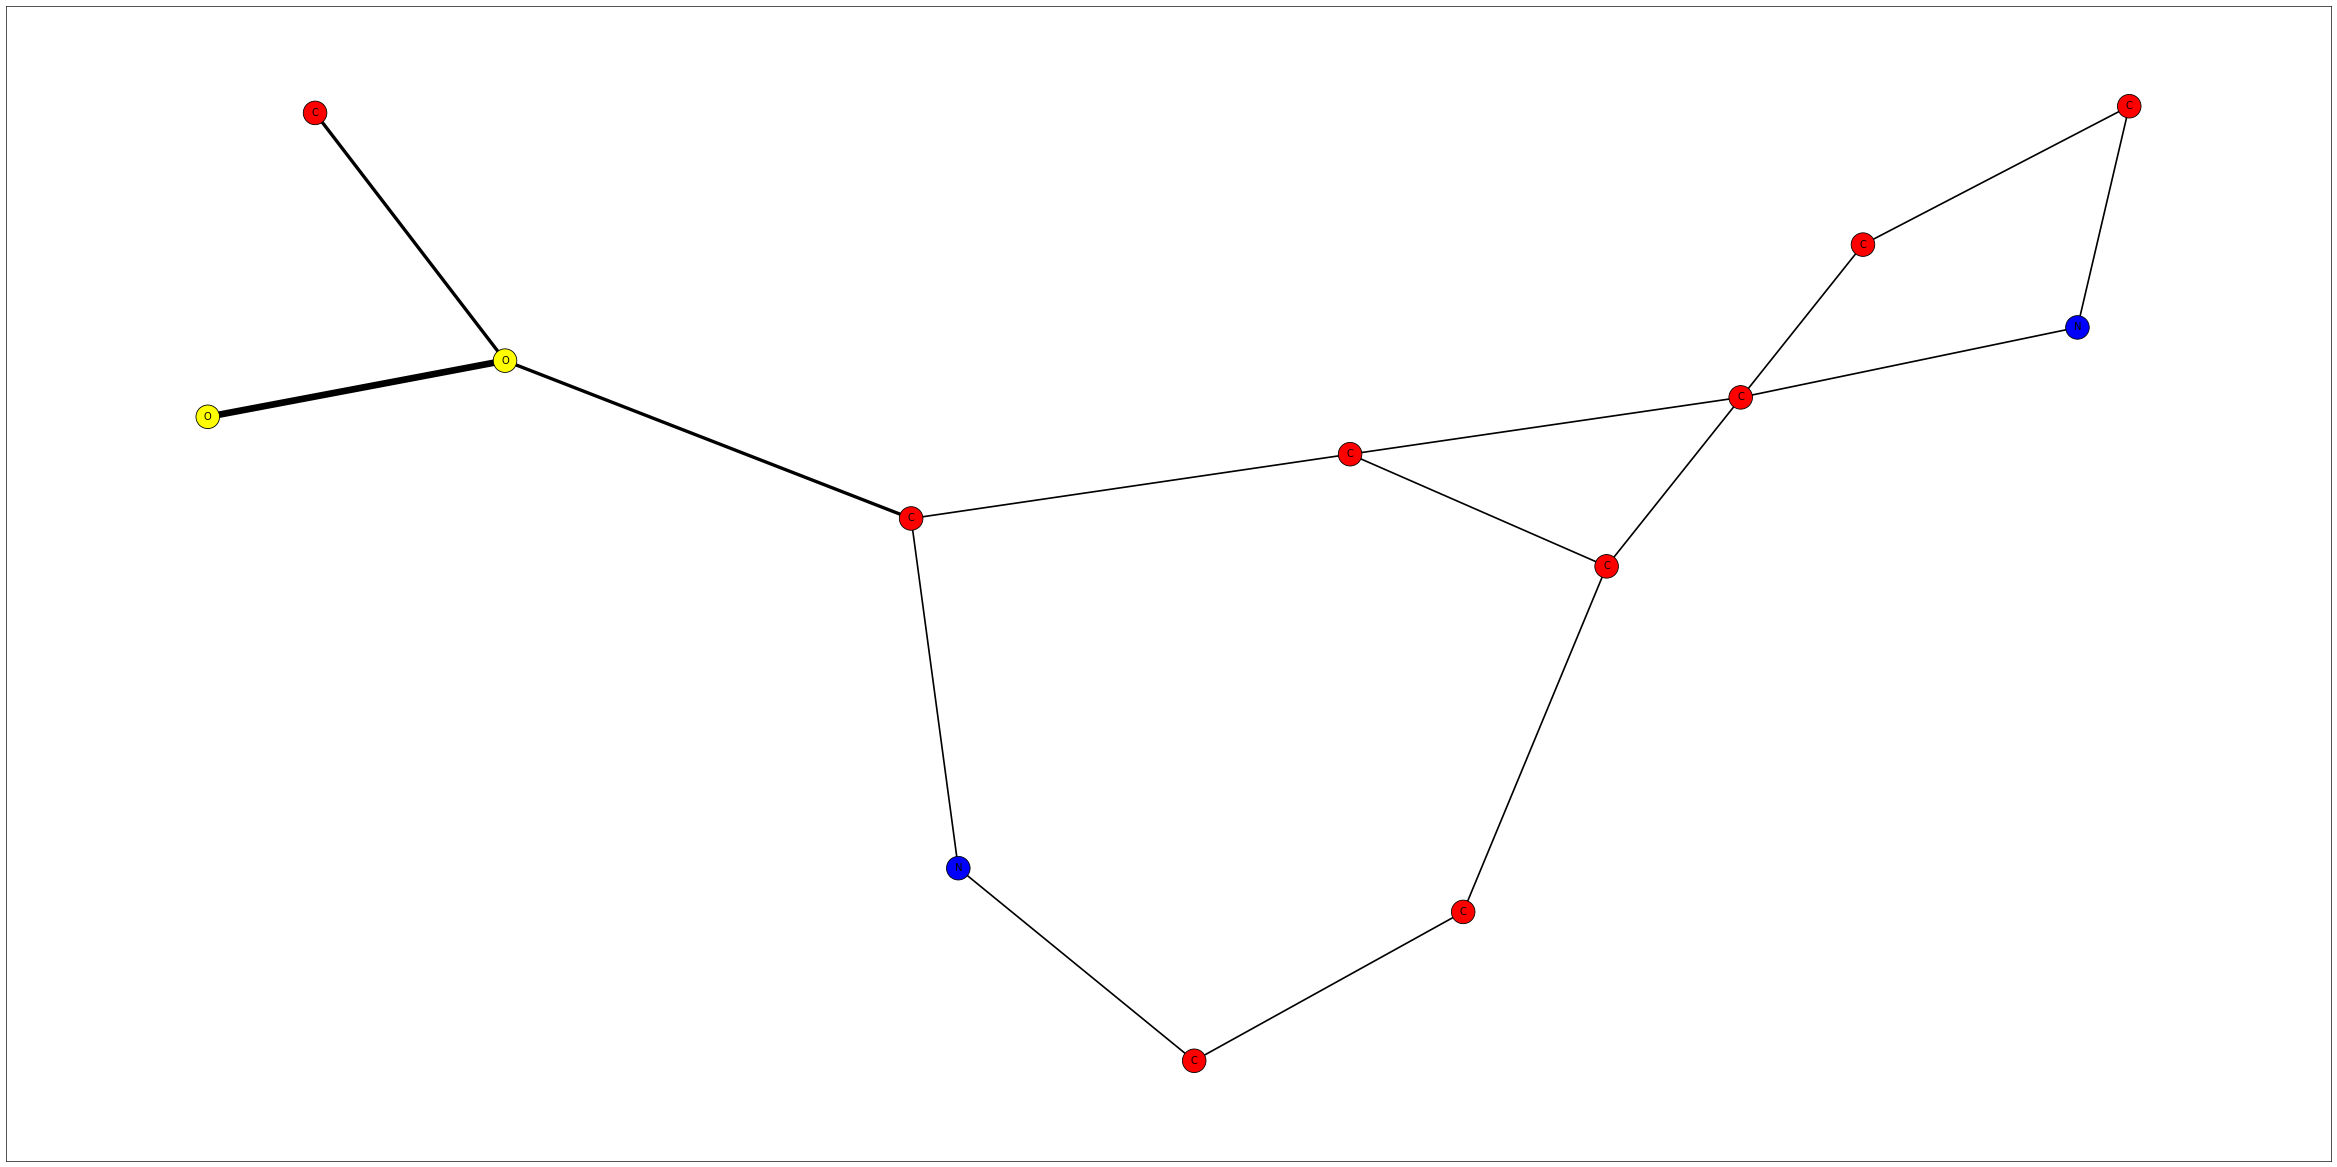

In [14]:
# g = mut_G_sgs[1]
plt.figure(1, figsize=(50, 25), dpi=60)
# set baseline network plot options
base_options = dict(with_labels=True, edgecolors="black", node_size=800)
# define layout of position
pos = nx.spring_layout(g)
# set node's color as we define previously
node_colors = [d['color'] for _, d in g.nodes(data=True)]
node_labels = {node:d['label_v'] for node, d in g.nodes(data=True)}
# add weights on edges to classify different bonds by widths
edge_type_visual_weight_lookup = {"aromatic":2,"single":4, "double":8, "triple":16}
edge_weights = [edge_type_visual_weight_lookup[d["type"]] for _, _, d in g.edges(data=True)]
# draw network
nx.draw_networkx(g, pos=pos, node_color=node_colors, width=edge_weights, labels = node_labels,  **base_options)
plt.show()

In [15]:
def decompositional_processing(G, X):
    # Initialize the ego-graph set and ego-graph features set
    S = {v: set() for v in G}
    C = {v: [] for v in G}

    # Iterate over each node in the graph
    for v in G:
        # Add the node and its neighbors to the ego-graph set
        S[v].add(v)
        S[v].update(G[v])

        C[v].append(X[v])
        # Iterate over the neighbors of the node
        for mu in G[v]:
            # Add the features of the neighbor to the ego-graph features set
            C[v].append(X[mu])

    return S, C

In [16]:
# number of qubits required to represent an egograph = max degree
degrees = [val for (node, val) in mut_G.degree()]
degree_sequence = sorted((d for n, d in mut_G.degree()), reverse=True)
dmax = max(degree_sequence)
dmax

4

In [17]:
def decompositional_processing(G, X):
    # Initialize the ego-graph set ego-graph features set
    S = {v: set() for v in G}
    C = {v: [] for v in G}
    
    # Find the maximum number of neighbors any node has in the graph
    max_neighbors = dmax #max(len(G[v]) for v in G)

    # Iterate over each node in the graph
    for v in G:
        # Add the node and its neighbors to the ego-graph set
        S[v].add(v)
        S[v].update(G[v])

        C[v].append(X[v])
        # Iterate over the neighbors of the node
        for mu in G[v]:
            # Add the features of the neighbor to the ego-graph features set
            C[v].append(X[mu])
        
        # If the feature set for this node is smaller than the maximum size, we pad with None
        if len(C[v]) < max_neighbors:
            C[v] += [7.0] * (max_neighbors - len(C[v]))

    return S, C

In [ ]:
# def decompositional_processing(G, X):
#     # Initialize the ego-graph set ego-graph features set
#     S = {v: set() for v in G}
#     C = {v: [] for v in G}
    
#     # Find the maximum number of neighbors any node has in the graph
#     max_neighbors = max(len(G[v]) for v in G)

#     # Iterate over each node in the graph
#     for v in G:
#         # Add the node and its neighbors to the ego-graph set
#         S[v].add(v)
#         S[v].update(G[v])

#         C[v].append(X[v])
#         # Iterate over the neighbors of the node
#         for mu in G[v]:
#             # Add the features of the neighbor to the ego-graph features set
#             C[v].append(X[mu])
        
#         # If the feature set for this node is smaller than the maximum size, we pad with None
#         if len(C[v]) < max_neighbors:
#             C[v] += [None] * (max_neighbors - len(C[v]))

#     return S, C

In [18]:
g = mut_G_sgs[2]
labels = {node:d['label'] for node, d in g.nodes(data=True)}
# Call the function with the graph and node features
ego_graphs, ego_graph_features = decompositional_processing(g, labels)  # taking node labels as features

# Print the results
print("Ego-graphs:", ego_graphs)
print("Ego-graph features:", ego_graph_features)

Ego-graphs: {'26': {'25', '28', '27', '26'}, '21': {'21', '20', '22'}, '18': {'27', '18', '19'}, '30': {'30', '28'}, '20': {'21', '20', '19', '25'}, '29': {'29', '28'}, '24': {'23', '24', '25'}, '22': {'21', '23', '22'}, '25': {'25', '20', '24', '26'}, '23': {'23', '24', '22'}, '27': {'27', '18', '26'}, '19': {'20', '18', '19'}, '28': {'30', '29', '28', '26'}}
Ego-graph features: {'26': [0.0, 0.0, 1.0, 2.0], '21': [0.0, 0.0, 0.0, 7.0], '18': [0.0, 0.0, 1.0, 7.0], '30': [0.0, 2.0, 7.0, 7.0], '20': [0.0, 0.0, 0.0, 0.0], '29': [2.0, 2.0, 7.0, 7.0], '24': [0.0, 1.0, 0.0, 7.0], '22': [0.0, 0.0, 1.0, 7.0], '25': [0.0, 0.0, 0.0, 0.0], '23': [1.0, 0.0, 0.0, 7.0], '27': [1.0, 0.0, 0.0, 7.0], '19': [0.0, 0.0, 0.0, 7.0], '28': [2.0, 0.0, 0.0, 2.0]}


In [19]:
# number of qubits required to represent an egograph = max degree
degrees = [val for (node, val) in mut_G.degree()]
degree_sequence = sorted((d for n, d in mut_G.degree()), reverse=True)
dmax = max(degree_sequence)
dmax



4

In [20]:

qvm = CPUQVM()
qvm.init_qvm()
qubits = qvm.qAlloc_many(4)
cbits = qvm.cAlloc_many(4)  # we need to allocate classical bits before measuring
measure_prog = QProg()
measure_prog << U1(qubits, pi/4) \
<< U1(qubits, pi/4) << U1(qubits, pi/4) << U1(qubits, pi/4) 
Uinit = measure_prog
# Use a loop to measure all the qubits
# for i in range(4):
#     measure_prog << Measure(qubits[i], cbits[i])

print(Uinit)


          ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ 
q_0:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ 
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ 
q_1:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ 
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ 
q_2:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ 
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ 
q_3:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ 
          └────────────┘ └────────────┘ └────────────┘ └────────────┘ 
 c :   / ═
          




In [27]:
# Initialize a quantum machine
qvm = CPUQVM()
qvm.init_qvm()#init_quantum_machine(QMachineType.CPU)

# Allocate qubits and classical bits
qubits = qvm.qAlloc_many(1)
cbits = qvm.cAlloc_many(1)  # We need to allocate classical bits before measuring

# Define the gate parameters
# Initialize all theta variables with initial float values.
variables = {f'theta{i}': 0.0 for i in range(4)}

# Define the training program
prog = QProg()

for i in range(4):
    # Create a U1 gate with a trainable parameter
    prog << U1(qubits[i], variables[f'theta{i}'])

# Add the measure operations
for i in range(4):
    prog << Measure(qubits[i], cbits[i])

# Define the trainable gate
uinit_trainable = prog

# Print the trainable gate
print(uinit_trainable)

IndexError: IndexError: list index out of range

In [32]:
# Initialize a quantum machine
qvm = CPUQVM()
qvm.init_qvm()

# Allocate qubits and classical bits
qubits = qvm.qAlloc_many(4)
cbits = qvm.cAlloc_many(4)  # We need to allocate classical bits before measuring

# Define the gate parameters
# Initialize all theta variables with initial float values.
variables = {f'theta{i}': 0.0 for i in range(4)}

# Define the training program
prog = QProg()

for i in range(4):
    # Create a U1 gate with a trainable parameter
    prog << U1(qubits[0], variables[f'theta{i}'])

# Add the measure operations
# for i in range(4):
# prog << Measure(qubits[0], cbits[0])

# Define the trainable gate
uinit_trainable = prog

# Print the trainable gate
print(uinit_trainable)


          ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ 
q_0:  |0>─┤U1(0.000000)├ ┤U1(0.000000)├ ┤U1(0.000000)├ ┤U1(0.000000)├ 
          └────────────┘ └────────────┘ └────────────┘ └────────────┘ 
 c :   / ═
          




In [34]:
ego_graph_features['26']

[0.0, 0.0, 1.0, 2.0]

In [53]:
features = ego_graph_features['20']

# Assign values to variables
for i in range(4):
    variables[f'theta{i}'] = features[i]
prog = QProg()

for i in range(4):
    # Create a U1 gate with a trainable parameter
    prog << U1(qubits[0], variables[f'theta{i}'])
print(uinit_trainable)
# Add the measure operations
# for i in range(4):
# prog << Measure(qubits[0], cbits[0])

# Define the trainable gate
uinit_trainable = prog

# Run the quantum program
qrun_result = qvm.directly_run(uinit_trainable)

# Get the quantum state
quantum_state = qvm.get_qstate()

print(quantum_state)

# D_prime = np.arccos(np.inner(phi_i, phi_j))
# loss += np.abs(D[i][j] - D_prime)


          ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ 
q_0:  |0>─┤U1(2.000000)├ ┤U1(0.000000)├ ┤U1(0.000000)├ ┤U1(2.000000)├ 
          └────────────┘ └────────────┘ └────────────┘ └────────────┘ 
 c :   / ═
          


[(1+0j), 0j]


In [37]:
# missing closing parenthesis has been added in the line below after features['26']
qvm.directly_run(uinit_trainable(ego_graph_features['26']))

# Get the quantum state
qvm.get_qstate()

TypeError: TypeError: 'pyqpanda.pyQPanda.QProg' object is not callable

In [30]:
qasm = convert_qprog_to_qasm(prog, qvm)
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg c[4];
measure q[0] -> c[0];


In [31]:
from pyqpanda import *
from scipy.optimize import minimize
import numpy as np

# Initialize a quantum machine
qvm = CPUQVM()
qvm.init_qvm()

# Define the initial parameters
P = np.random.rand(4)

# Define the features
X = np.array(list(ego_graph_features.values()))

# Compute the dot product matrix D
D = X @ X.T

def trainable_mapping(P):
    # Apply the trainable mapping for each feature vector
    qubits = qvm.qAlloc_many(len(P))
    cbits = qvm.cAlloc_many(len(P))
    for i, xi in enumerate(X):
        prog = QProg()
        for j, pj in enumerate(P):
            # Create a U1 gate with a trainable parameter
            prog << U1(qubits[j], pj*xi[j])
        # Measure the quantum state
        expr = prog << Measure(qubits[i], cbits[i])
        qvm.run(prog)
        result = qvm.pmeasure_no_index(prog)
    
    D_prime = np.array([[result.get_res(str(i)) for i in range(len(X))] for _ in range(len(X))])
    Lmap = np.abs(D - D_prime).sum()
    
    return Lmap

# Define the optimization problem
result = minimize(trainable_mapping, P)

# Return the trained initial parameters of the mapping circuit
Pt = result.x

AttributeError: AttributeError: 'pyqpanda.pyQPanda.CPUQVM' object has no attribute 'run'

In [ ]:
from pyqpanda import *
from scipy.optimize import minimize
import numpy as np

# Initialize a quantum machine
qvm = CPUQVM()
qvm.init_qvm()

# Define the initial parameters
P = np.random.rand(4)

# Define the features
X = np.array(list(ego_graph_features.values()))

# Compute the dot product matrix D
D = X @ X.T

def trainable_mapping(P):
    # Apply the trainable mapping for each feature vector
    qubits = qvm.qAlloc_many(len(P))
    cbits = qvm.cAlloc_many(len(P))
    for i, xi in enumerate(X):
        prog = QProg()
        for j, pj in enumerate(P):
            # Create a U1 gate with a trainable parameter
            prog << U1(qubits[j], pj*xi[j])
        # Measure the quantum state
        expr = prog << Measure(qubits[i], cbits[i])
        qvm.run(prog)
        result = qvm.pmeasure_no_index(prog)
    
    D_prime = np.array([[result.get_res(str(i)) for i in range(len(X))] for _ in range(len(X))])
    Lmap = np.abs(D - D_prime).sum()
    
    return Lmap

# Define the optimization problem
result = minimize(trainable_mapping, P)

# Return the trained initial parameters of the mapping circuit
Pt = result.x

In [25]:
X = ego_graph_features
D = {v: {} for v in X}
for i in X:
    for j in X:
        D[i][j] = np.dot(X[i], X[j])
D

{'26': {'26': 5.0,
  '21': 14.0,
  '18': 15.0,
  '30': 21.0,
  '20': 0.0,
  '29': 21.0,
  '24': 14.0,
  '22': 15.0,
  '25': 0.0,
  '23': 14.0,
  '27': 14.0,
  '19': 14.0,
  '28': 4.0},
 '21': {'26': 14.0,
  '21': 49.0,
  '18': 49.0,
  '30': 49.0,
  '20': 0.0,
  '29': 49.0,
  '24': 49.0,
  '22': 49.0,
  '25': 0.0,
  '23': 49.0,
  '27': 49.0,
  '19': 49.0,
  '28': 14.0},
 '18': {'26': 15.0,
  '21': 49.0,
  '18': 50.0,
  '30': 56.0,
  '20': 0.0,
  '29': 56.0,
  '24': 49.0,
  '22': 50.0,
  '25': 0.0,
  '23': 49.0,
  '27': 49.0,
  '19': 49.0,
  '28': 14.0},
 '30': {'26': 21.0,
  '21': 49.0,
  '18': 56.0,
  '30': 102.0,
  '20': 0.0,
  '29': 102.0,
  '24': 51.0,
  '22': 56.0,
  '25': 0.0,
  '23': 49.0,
  '27': 49.0,
  '19': 49.0,
  '28': 14.0},
 '20': {'26': 0.0,
  '21': 0.0,
  '18': 0.0,
  '30': 0.0,
  '20': 0.0,
  '29': 0.0,
  '24': 0.0,
  '22': 0.0,
  '25': 0.0,
  '23': 0.0,
  '27': 0.0,
  '19': 0.0,
  '28': 0.0},
 '29': {'26': 21.0,
  '21': 49.0,
  '18': 56.0,
  '30': 102.0,
  '20': 0.0,


In [28]:
# Assume that 'X' is the dictionary named ego_graph_features from the above code
X = ego_graph_features

# Placeholder function to represent missing actual implementation
def Placeholder_Function():
    pass

# Calculate Dij, the dot product of each pair of node features
D = {v: {} for v in X}
for i in X:
    for j in X:
        D[i][j] = np.dot(X[i], X[j])

# Initialize the mapping circuit MC with random parameters P
P = np.random.rand(len(X), 1)
MC = uinit_trainable() # Define MC based on actual implementation

# Map the input features to quantum states using MC
phi = uinit_trainable() # Define phi according to implementation

# Calculate D'ij, the distance between each pair of quantum states
# and add to the loss
D_prime = {v: {} for v in phi}
Lmap = 0
for i in phi:
    for j in phi:
        D_prime[i][j] = uinit_trainable() # Replace with the implementation of ⟨φi|φj ⟩
        Lmap += abs(D[i][j] - D_prime[i][j])

# Placeholder for argmin Loss operation and update trained parameters P_t
P_t = uinit_trainable() # Replace with the implementation to minimize Lmap

TypeError: TypeError: 'pyqpanda.pyQPanda.QProg' object is not callable

In [ ]:
# Initialize a quantum machine
qvm = CPUQVM()
qvm.init_qvm()

# Allocate qubits and classical bits
qubits = qvm.qAlloc_many(dmax)
cbits = qvm.cAlloc_many(dmax)  # We need to allocate classical bits before measuring

# Define the gate parameters
# In the implementation below, a dictionary is created to hold the variables for the parameters to be optimized.
variables = {f'theta{i}': 0.0 for i in range(dmax)}

# Define the training program
prog = QProg()

for i in range(dmax):
    # Create a U1 gate with a trainable parameter
    prog << U1(qubits[i], variables[f'theta{i}'])

# Add the measure operations
for i in range(dmax):
    prog << Measure(qubits[i], cbits[i])

# Convert the prog QProg to QASM string format
qasm_str = to_qasm(prog, qvm)

# In the QASM format, you can replace the parameters in the string with new values as you optimize them.
# Here, you would write an optimization loop that iteratively updates the values of the parameters and
# reevaluates the circuit.

# Placeholder loop for optimization
for iteration in range(NUM_ITERATIONS):
  # Update parameter values
  for i in range(dmax):
      variables[f'theta{i}'] = UPDATE_FUNCTION()  # Replace with the update function

  # Create a new circuit with the updated parameter values
  new_qasm_str = REPLACE_PARAMETERS_WITH_VALUES(qasm_str, variables) # Replace the function with the implementation of replacing parameters with values
  new_prog = from_qasm(new_qasm_str)

  # Simulate the circuit and calculate the loss


In [22]:
measure_prog = QProg()
measure_prog << RX(qubits, pi / 4) \
<< RY(qubits, pi / 4) \
<< RZ(qubits, pi / 4) 
# for i in range(4):
#     measure_prog << Measure(qubits[i], cbits[i])
Ucov = measure_prog
print(Ucov)


          ┌────────────┐ ┌────────────┐ ┌────────────┐ 
q_0:  |0>─┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ 
          ├────────────┤ ├────────────┤ ├────────────┤ 
q_1:  |0>─┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ 
          ├────────────┤ ├────────────┤ ├────────────┤ 
q_2:  |0>─┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ 
          ├────────────┤ ├────────────┤ ├────────────┤ 
q_3:  |0>─┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ 
          └────────────┘ └────────────┘ └────────────┘ 
 c :   / ═
          




In [23]:
measure_prog = QProg()
measure_prog << CNOT(qubits[0],qubits[1]) << CNOT(qubits[1],qubits[2]) << CNOT(qubits[2],qubits[3])
# for i in range(4):
#     measure_prog << Measure(qubits[i], cbits[i])
Uent = measure_prog
print(Uent)


                               
q_0:  |0>────■── ────── ────── 
          ┌──┴─┐               
q_1:  |0>─┤CNOT├ ───■── ────── 
          └────┘ ┌──┴─┐        
q_2:  |0>─────── ┤CNOT├ ───■── 
                 └────┘ ┌──┴─┐ 
q_3:  |0>─────── ────── ┤CNOT├ 
                        └────┘ 
 c :   / ═
          




In [27]:
measure_prog = QProg()
measure_prog << Uinit << Ucov << Uent
Ulayer = measure_prog
print(Ulayer)


          ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ >
q_0:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ >
q_1:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ >
q_2:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ >
q_3:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          └────────────┘ └────────────┘ └────────────┘ └───────

In [30]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 19.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [40]:
try:
    # Import required libraries from qiskit
    from qiskit import QuantumCircuit, transpile, execute
    from math import pi

    # create a quantum circuit with 4 qubits and 4 classical bits
    circuit = QuantumCircuit(4, 4)

    # Applying various quantum operations defined earlier in pyqpanda using qiskit methods
    # Phase gate
    for qubit in range(4):
        circuit.p(pi/4, qubit)

    # RX rotation
    for qubit in range(4):
        circuit.rx(pi / 4, qubit)

    # RY rotation
    for qubit in range(4):
        circuit.ry(pi / 4, qubit)

    # RZ rotation
    for qubit in range(4):
        circuit.rz(pi / 4, qubit)

    # CNOT gate
    for i in range(3):
        circuit.cx(i, i + 1)

    print(circuit)

    # set the simulator
    simulator = qiskit.Aer.get_backend('statevector_simulator')

    # transpile the circuit for the simulator
    compiled_circuit = transpile(circuit, simulator)

    # run the experiment
    job = execute(compiled_circuit, simulator)
    result = job.result()

    # print the result
    print(result.get_statevector())

except ImportError as e:
    print(e)

cannot import name 'execute' from 'qiskit' (/opt/python/envs/default/lib/python3.8/site-packages/qiskit/__init__.py)


In [25]:
for i in range(4):
    Ulayer << Measure(qubits[i], cbits[i])
print(Ulayer)


          ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ ┌────────────┐ >
q_0:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ >
q_1:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ >
q_2:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ ├────────────┤ >
q_3:  |0>─┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤U1(0.785398)├ ┤RX(0.785398)├ ┤RY(0.785398)├ ┤RZ(0.785398)├ >
          └────────────┘ └────────────┘ └────────────┘ └───────

In [26]:
qvm.run_with_configuration(Ulayer, cbits, 20)

{'0000': 7,
 '0001': 1,
 '0100': 2,
 '1000': 4,
 '1011': 1,
 '1100': 2,
 '1110': 1,
 '1111': 2}

In [109]:
qvm.get_allocate_qubit_num()

4

In [119]:
qvm.get_qstate()

[(0.35355339059327373-0.4375000000000001j),
 (0.0625-0.17677669529663687j),
 (0.06250000000000003-0.1767766952966368j),
 (0.06250000000000003-0.1767766952966368j),
 (0.06250000000000003-0.17677669529663684j),
 (6.938893903907228e-18-0.0625j),
 (0.06250000000000006-0.17677669529663687j),
 (0.06250000000000001-0.17677669529663684j),
 (0.15847086912079617-0.283470869120796j),
 (0.01830582617584077-0.10669417382415922j),
 (0.018305826175840784-0.1066941738241592j),
 (0.018305826175840777-0.10669417382415922j),
 (0.15847086912079617-0.283470869120796j),
 (0.018305826175840777-0.10669417382415923j),
 (0.15847086912079617-0.28347086912079605j),
 (0.1584708691207961-0.28347086912079605j)]

Uncheked , Not run yet 

In [ ]:
def trainable_mapping(X, P, MC):
    V = X.keys()
    D = np.zeros((len(V), len(V)))
    
    # Compute Dij
    for i in V:
        for j in V:
            D[i][j] = np.dot(X[i], X[j])

    # Compute D'ij and Loss
    loss = 0
    for i in V:
        phi_i = MC(P, X[i])
        
        for j in V:
            phi_j = MC(P, X[j])
            D_prime = np.arccos(np.inner(phi_i, phi_j))
            loss += np.abs(D[i][j] - D_prime)
            
    # Optimize the loss to get trained parameters
    # P_t = optimize(loss)
    P_t = None  # Placeholder
    
    return P_t

In [ ]:
def QNN(S, C, rho0, rho1):
    q_states = {}
    for v in S.keys():
        # Prepare the quantum state for each node using the given quantum circuit
        q_states[v] = QC(S[v], C[v])
        # Calculate the density matrix for each node
        # This is simply the outer product of the node's quantum state with itself
        rho_v = np.outer(q_states[v], q_states[v].conj())
        q_states[v] = rho_v

    # Sum the density matrices of all nodes to get the total quantum state of the graph
    rho_G = sum(q_states.values())
    
    # Classify the graph based on its distance from precalculated class representations
    y_G = 0 if np.linalg.norm(rho_G - rho0) < np.linalg.norm(rho_G - rho1) else 1

    return y_G

In [ ]:
def QC(S, C):
    qvm = CPUQVM().init_qvm()
    q = qvm.qAlloc_many(len(S))
    
    # Initialising a quantum program
    gate = QProg()
    
    for i in range(len(S)):
        # Applying Ulayer to each qubit
        gate << Ulayer
    
    qvm.run(gate)
    q_state = qvm.get_qstate()
    
    return q_state

In [37]:
from pyqpanda import *

def process_egographs(X, P, n, U1, U2, MC):
    QVM = CPUQVM()  # initialise Quantum Virtual Machine
    QVM.init_qvm()
    q_state_dict = {}

    for v, s in ego_graphs.items():  # iterate over each node and ego_graph set pairs
        qubits = QVM.qAlloc_many(n)  # allocate n qubits
        prog = QProg()  # initialise a quantum programme

        for mu in s:  # iterate over nodes in ego-graph set
            features = X[mu]
            phi = MC(P, features)  # Create initial quantum state representation

            # Perform operations U1, U2 here on the quantum state and add to the quantum programme

        res = QVM.run(prog)  # Run the quantum program on the QVM and get final states

        # Capture the quantum state,
        q_state_dict[v] = parse_state(res.get_counts())

        # Free the allocated qubits. 
        QVM.qFree(qubits)

    return q_state_dict

Rough Work 

In [ ]:
def MC(P, x):
    """
    Given parameters P and feature vector x,
    returns an initial quantum state representation.


    Args
    P (np.ndarray): Parameters array
    x (np.ndarray): Feature vector

    Returns
    np.ndarray: The quantum state representation
    """
    # Convert x into a complex quantum state representation (placeholder example)
    phi = np.exp(1j * np.dot(P, x))
    
    
    # Normalize state
    phi = phi / np.linalg.norm(phi)
    
    return phi

In [ ]:
def apply_quantum_operations_to_subgroup(q_representations, subgroup, P, U1, U2, MC):
    # Compute the quantum state for the subgroup (Eq. 15)
    phi_vi = 0
    for mu in subgroup:
        phi_mu = q_representations[mu] if mu in q_representations else MC(P, X[mu])
        phi_vi += U2 * phi_mu
    return phi_vi

def apply_quantum_operations(q_representations, X, P, U1, U2, MC, n):
    new_q_representations = {}
    V = X.keys()  # nodes of the graph

    for v in V:
        if v not in q_representations:
            phi_v = MC(P, X[v])
        else:
            phi_v = q_representations[v]

        # Divide the neighbors into subgroups with size less than or equal to n
        neighbors = list(G[v])
        subgroups = [neighbors[i:i + n] for i in range(0, len(neighbors), n)]

        # Compute new quantum state for each node (Eq. 16)
        new_phi_v = U1 * phi_v
        for subgroup in subgroups:
            phi_vi = apply_quantum_operations_to_subgroup(q_representations, subgroup, P, U1, U2, MC)
            new_phi_v += phi_vi

        new_q_representations[v] = normalize(new_phi_v)  # normalize method to be added separately

    return new_q_representations